# 📈📉 Análisis de las acciones de Apple - Técnicas Avanzadas de Análisis Estadístico

**Luisa María Flórez Múnera**

**Samuel Pérez Hurtado**

Se importan las librerías necesarias para el correcto análisis del precio de las acciones de Apple.

In [1]:
#Yahoo financials es una librería últil para importar los datasets sobre los precios de las acciones
#de las empresas que cotizan en bolsa
!pip install yfinance
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#Importante verificar la versión que se tiene de statsmodels
#https://www.statsmodels.org/stable/tsa.html
import statsmodels as sm
sm.__version__

'0.14.0'

Usando la librería de Yahoo, se le indica al Ticker el nombre de la empresa con el formato que se le da internacionalmente (por lo general son 4 caracteres), en el caso de Apple es APPL. También se indica el periodo en el que vamos a hacer el análisis y la frecuencia, que en este caso es diaria.

0.14.0


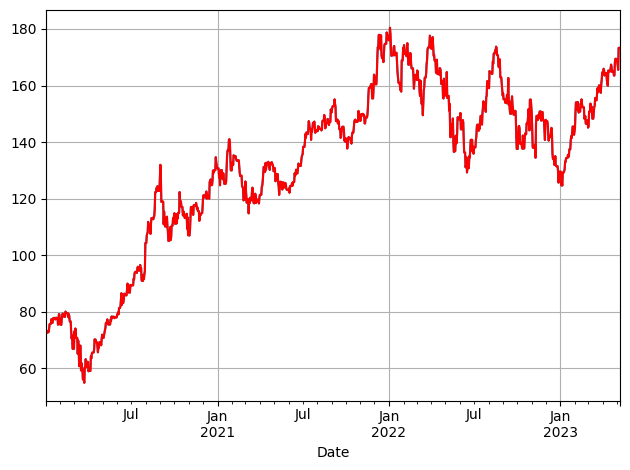

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import statsmodels as sm
print(sm.__version__)
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import acf

tickerData = yf.Ticker('AAPL')
data = tickerData.history(start = '2020-01-01', end = '2023-05-09')['Close']
data=data.asfreq('D', method='ffill') #Para la periodicidad DIARIA
data.plot()
plt.plot(data, color='red')
plt.grid()
plt.tight_layout()

Se determina un intervalo de tiempo a partir del 01 de enero de 2023 debido a que la gráfica de los datos indica cómo la acción decae en este lapso de tiempo y luego vuelve a ascender. Se estimó la descomposición en sus componentes principales: tendencia, estacionalidad y residuo, y se le aplicó un modelo aditivo y uno multiplicativo. También se calcula la varianza y la media del residuo de la descomposición de la serie de tiempo utilizando una ventana de tamaño 14 y con el punto central ajustado en ambos modelos para visualizar cómo varía la variabilidad del residuo a lo largo del tiempo y para ver cómo varía la tendencia no explicada por la descomposición a lo largo del tiempo.

### Modelo Multiplicativo

Text(0.5, 1.0, 'Media en el tiempo del residuo')

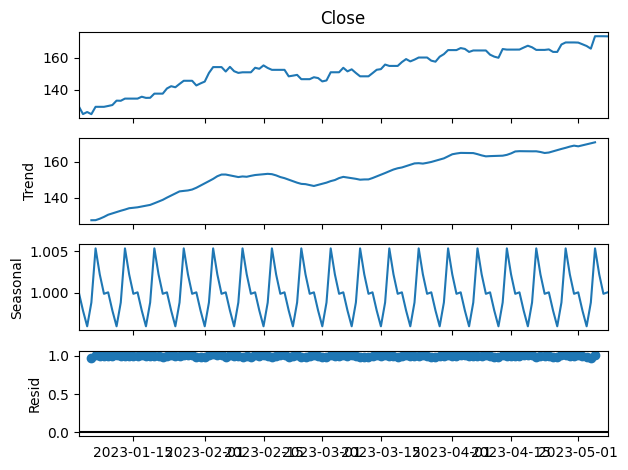

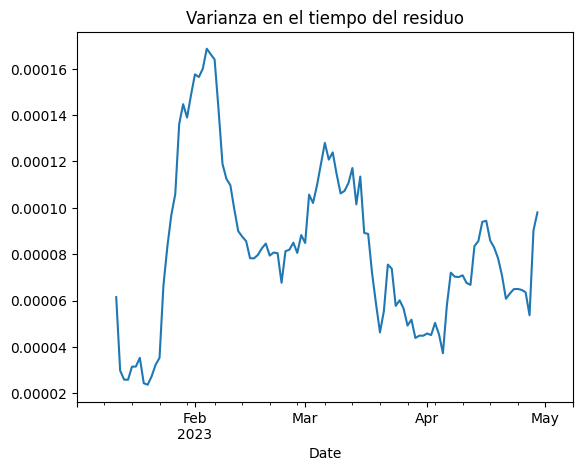

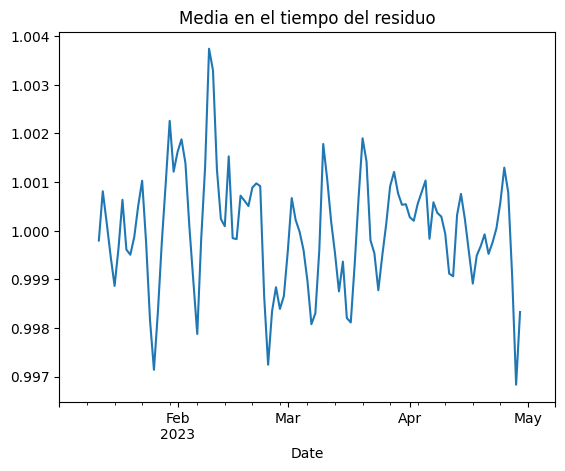

In [4]:
data2= data[data.index>'2023-01-01'] 
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data1 = seasonal_decompose(data2, model="multiplicative")
decompose_data1.plot();
plt.figure()
decompose_data1.resid.rolling(window=14, center=True).var().plot()
plt.title('Varianza en el tiempo del residuo')
plt.figure()
decompose_data1.resid.rolling(window=14, center=True).mean().plot()
plt.title('Media en el tiempo del residuo')

### Modelo Aditivo

Text(0.5, 1.0, 'Media en el tiempo del residuo')

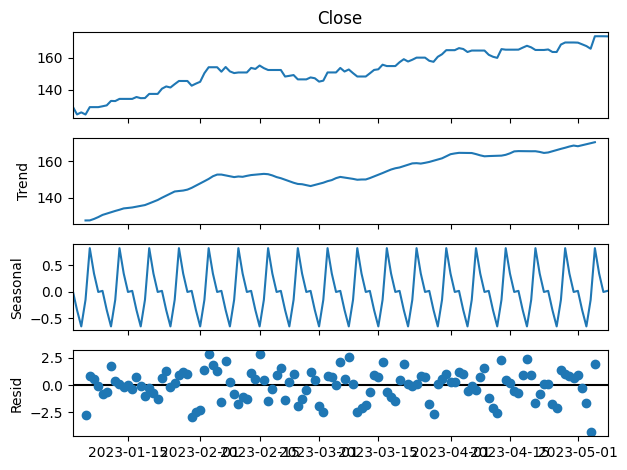

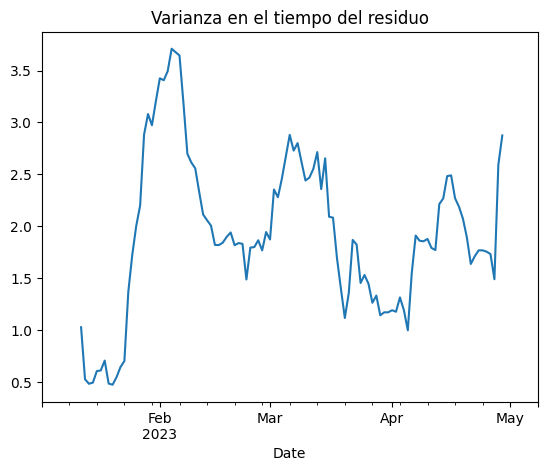

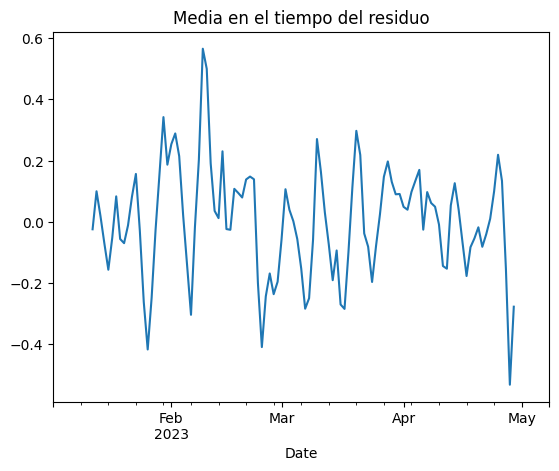

In [5]:
decompose_data2 = seasonal_decompose(data2, model="aditive") 
decompose_data2.plot();
plt.figure()
decompose_data2.resid.rolling(window=14, center=True).var().plot()
plt.title('Varianza en el tiempo del residuo')
plt.figure()
decompose_data2.resid.rolling(window=14, center=True).mean().plot()
plt.title('Media en el tiempo del residuo')

El gráfico de la varianza en el tiempo del residuo muestra cómo varía la variabilidad del residuo a lo largo del tiempo. En este caso, la varianza muestra patrones de cambio, lo cual puede indicar que el modelo no está capturando completamente la variabilidad en los datos.

El gráfico de la media en el tiempo del residuo muestra cómo varía la tendencia no explicada por la descomposición a lo largo del tiempo. Como se evidencia en ambos modelos, la media es cercana a cero y constante, lo cual demuestra que el modelo de descomposición está capturando adecuadamente la tendencia no explicada. 

### Comparación de los residuos de ambos modelos

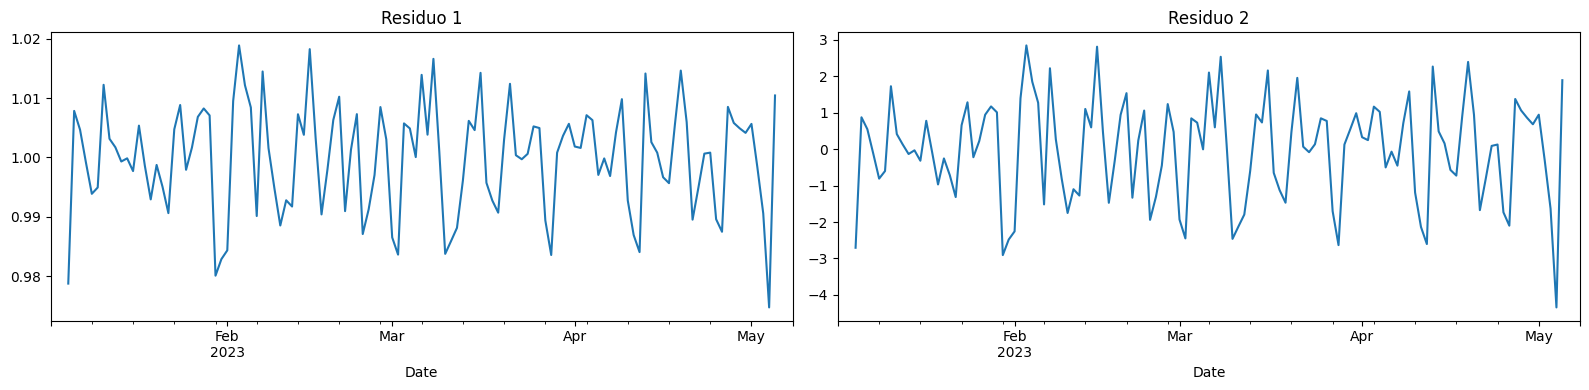

In [6]:
residuo1 = decompose_data1.resid
residuo2 = decompose_data2.resid

plt.figure(figsize=(16, 4))

# Subplot 1 para el residuo1
plt.subplot(1, 2, 1)
residuo1.plot()
plt.title('Residuo 1')

# Subplot 2 para el residuo2
plt.subplot(1, 2, 2)
residuo2.plot()
plt.title('Residuo 2')

plt.tight_layout()
plt.show()

La razón para utilizar el modelo multiplicativo en lugar del modelo aditivo en el análisis de series de tiempo de Apple es que la variación de los datos aumenta o disminuye proporcionalmente con el nivel de los datos, lo cual se ve reflejado en el residuo de este modelo y es útil cuando se trata de datos que muestran un crecimiento o una disminución exponencial con el tiempo como se evidencia en la serie de tiempo de la acción.

### Gráfico de la componente estacional de la descomposición 

Permite visualizar los patrones estacionales específicos que ocurren después de esa fecha y analizar cómo varían en el tiempo, específicamente para el período posterior al 1 de marzo de 2023.

<Figure size 640x480 with 0 Axes>

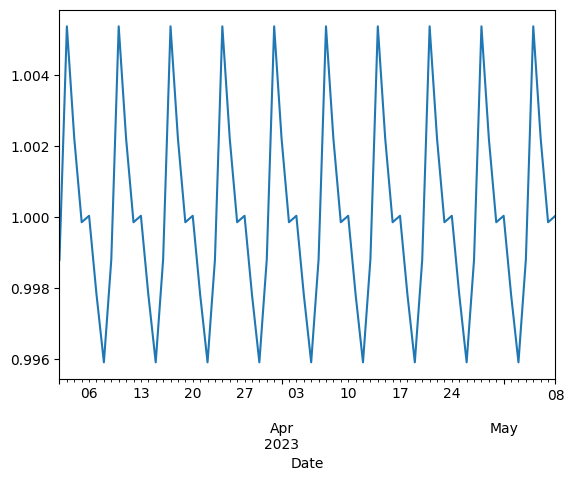

<Figure size 640x480 with 0 Axes>

In [7]:
decompose_data1.seasonal[decompose_data1.seasonal.index>'2023-03-01'].plot()
plt.figure()

### Descomposición manual de la serie centrándose en el análisis de la tendencia.

Se suaviza la serie de tiempo utilizando la media móvil y luego se calcula una versión de la serie de tiempo sin la tendencia dividiendo los valores originales por los valores suavizados.

<AxesSubplot: xlabel='Date'>

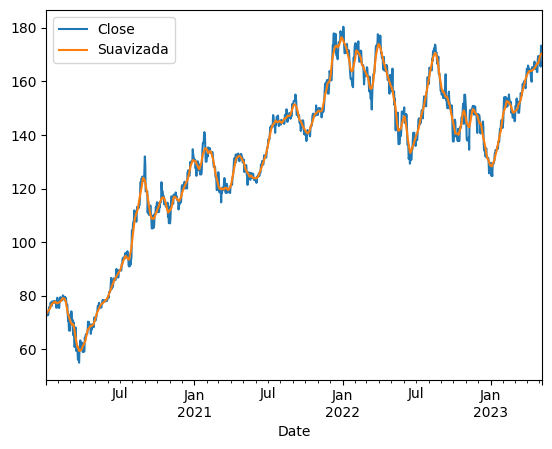

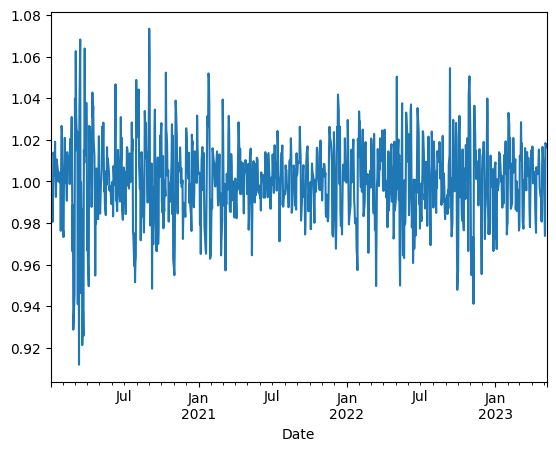

In [8]:
#Por ejemplo, la tendencia se puede analizar suavizando la curva
apple=data.to_frame(name='Close')
apple['Suavizada']=apple['Close'].rolling(window=14, center=True, min_periods=1).mean()
apple.plot()
apple['Sin tendencia']=apple['Close']/apple['Suavizada']
plt.figure()
apple['Sin tendencia'].plot()

Los gráficos generados permiten visualizar la serie de tiempo original, la versión suavizada y la serie de tiempo sin tendencia, con el fin de comprender mejor la tendencia en los datos y analizar cómo se comportan los valores después de eliminar la tendencia.

### Autocorrelación del residuo de la descomposición de la serie de tiempo

Permite analizar la autocorrelación de los residuos y determinar si existe algún patrón de correlación entre los valores pasados y futuros.

(0.0, 10.0)

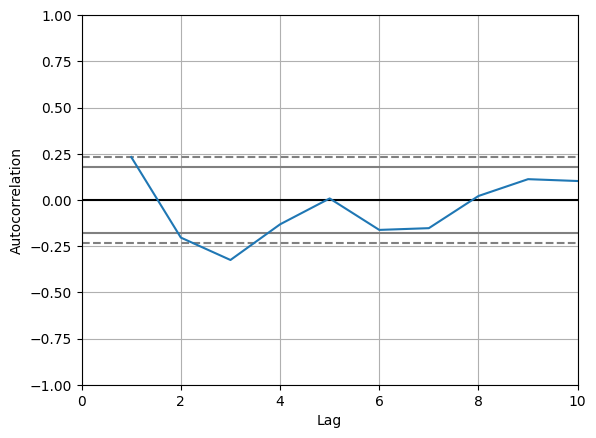

In [9]:
residuo=decompose_data1.resid.dropna()
pd.plotting.autocorrelation_plot(residuo)
plt.xlim(0,10)

Se evidencia, en ciertos desfases, la presencia de patrones estacionales o de otro tipo en los datos.


### Operación de diferenciación

 Elimina la tendencia o cualquier componente de cambio gradual en la serie de tiempo, lo que puede ayudar a estabilizar la varianza o hacer que la serie sea estacionaria (nuestro principal objetivo).

<AxesSubplot: xlabel='Date'>

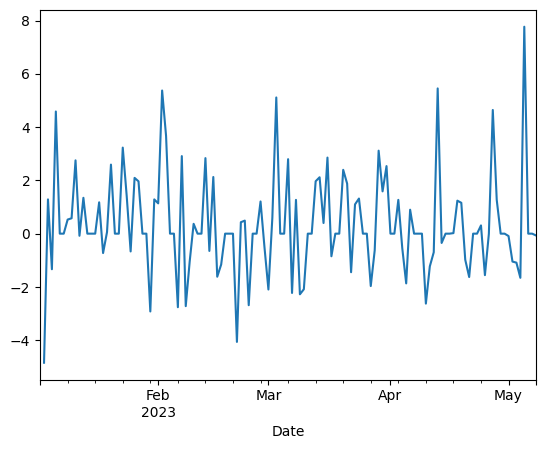

In [10]:
data2.diff().plot()

### Estimación y predicción de un modelo SARIMA

(Seasonal AutoRegressive Integrated Moving Average)

El modelo es de orden ARIMA(0,1,1), es decir, sin componente autorregresiva (AR), componente de integración de orden 1 (I) que corresponde a la serie diferenciada (diff()), y componente de media móvil (MA) de orden 1.

 This problem is unconstrained.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.04175D+00    |proj g|=  1.64884D-01

At iterate    5    f=  2.04042D+00    |proj g|=  9.16629D-01

At iterate   10    f=  2.03999D+00    |proj g|=  3.70002D-02

At iterate   15    f=  2.03997D+00    |proj g|=  7.86826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   8.811D-06   2.040D+00
  F =   2.0399647741724021     

CONVERGENCE: NORM_OF_PROJECTED_GRADIE

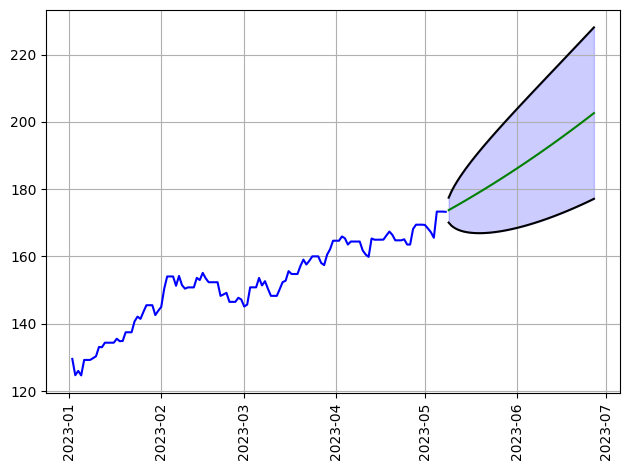

In [11]:
ARMAmodel=SARIMAX(data2, order=(0,1,1), trend='t') 
results=ARMAmodel.fit() 
pred=results.get_forecast(50) #50 días
pred_df=pred.conf_int(alpha=0.05) #Intervalos de confianza
pred_df['Prediction']=results.predict(start=pred_df.index[0], end=pred_df.index[-1])
#print(pred_df)
plt.plot(data2, color='blue')
plt.plot(pred_df['Prediction'], color='green')
plt.plot(pred_df['lower Close'], color='black')
plt.plot(pred_df['upper Close'], color='black')
plt.gca().fill_between(pred_df.index, pred_df['lower Close'], pred_df['upper Close'], color='blue', alpha=0.2)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()

Al observar la línea verde que representa las predicciones, se puede inferir la dirección general de la serie de tiempo en los próximos 50 días. Como la línea verde muestra una tendencia ascendente esto sugiere la dirección en la cual la serie de tiempo puede estar evolucionando.

### Comprobar predicción con datos de hace un mes

 This problem is unconstrained.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02836D+00    |proj g|=  1.12770D-01

At iterate    5    f=  2.02454D+00    |proj g|=  6.48052D-01

At iterate   10    f=  2.02420D+00    |proj g|=  2.40953D-02

At iterate   15    f=  2.02407D+00    |proj g|=  6.49522D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   6.096D-07   2.024D+00
  F =   2.0240711669895584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIE

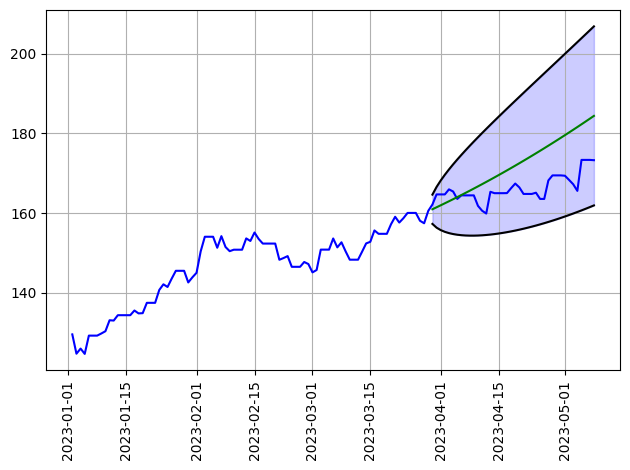

In [12]:
#Hace un mes
ARMAmodel=SARIMAX(data2[data2.index<'2023-03-30'], order=(0,1,1), trend='t') #order=(0,1,1): AR se pone de orden 0 osea que no es AR, I:1 diff() de una vez y MA(1), la tendencia respecto al tiempo, es decir lineal
results=ARMAmodel.fit() #Acá hay una diferencia respecto al documento. Se debe obtener un objeto SARIMAXresults luego de hacer el ajuste del modelo
pred=results.get_forecast(40) #40 días
pred_df=pred.conf_int(alpha=0.05) #Intervalos de confianza
pred_df['Prediction']=results.predict(start=pred_df.index[0], end=pred_df.index[-1])
#print(pred_df)
plt.plot(data2, color='blue')
plt.plot(pred_df['Prediction'], color='green')
plt.plot(pred_df['lower Close'], color='black')
plt.plot(pred_df['upper Close'], color='black')
plt.gca().fill_between(pred_df.index, pred_df['lower Close'], pred_df['upper Close'], color='blue', alpha=0.2)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()

### Evaluación de la predicción con MAE y MSE

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Obtener los valores reales
actual_values = data2[data2.index >= '2023-03-30']

# Obtener las predicciones
predicted_values = pred_df['Prediction']

# Calcular el MAE
mae = mean_absolute_error(actual_values, predicted_values)
print("MAE:", mae)

# Calcular el MSE
mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)


MAE: 6.603565558231002
MSE: 60.1350404948151
